In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (10,8)

In [4]:
#Reading the data
df = pd.read_csv('foundations-of-datascience-datsets/physics/exoplanet-temp.csv')
df = df.dropna() #For convenience, we drop any rows with any NaN entries
print(df)

      P. Teq Mean (K)  P. Ts Mean (K)
38             1790.4          1833.5
40             1054.4          1095.7
50             1068.0          1102.1
57              498.9           546.5
65             1177.4          1221.5
88             1664.6          1706.5
126             510.7           551.3
127             431.1           475.2
130            1244.9          1287.2
131            1015.0          1064.4
132             148.9           193.9
133            1359.1          1432.1
134            1232.2          1269.4
136             974.0          1014.8
139            1184.0          1224.0
140             857.8           907.3
141            1124.4          1168.6
142             846.7           892.0
143             523.9           568.3
147             368.0           415.6
148             549.8           595.1
149             541.4           589.0
150             711.4           755.4
151             605.9           643.5
153             793.3           829.3
154         

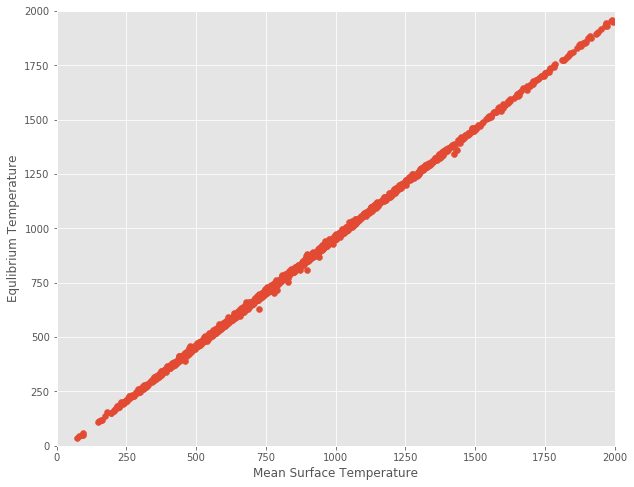

In [9]:
#Plot the data here to visualize the trend
plt.scatter(df['P. Ts Mean (K)'], df['P. Teq Mean (K)'])
#plt.scatter(df['M (g)'], df['T (s)'])
plt.xlabel('Mean Surface Temperature')
plt.ylabel('Equlibrium Temperature')
plt.xlim(0, 2000)
plt.ylim(0, 2000)
plt.show()
#plt.clf()

In [10]:
n = df['P. Ts Mean (K)'].count()                #Number of samples
p = np.sum(np.square(df['P. Ts Mean (K)']))     #The sum of x^2
q = df['P. Ts Mean (K)'].sum()                  #The sum of x
r = np.sum(df['P. Ts Mean (K)']*df['P. Teq Mean (K)'])    #The sum of the product of x and y
s = df['P. Teq Mean (K)'].sum()                  #The sum of y^2

#Print all of the above
print("The number of samples is:\t", n)
print("The sum of Ts^2 is:\t\t", p)
print("The sum of Ts is:\t\t", q)
print("The sum of Ts*Teq is:\t\t", r)
print("The sum of Teq is:\t\t",s)

The number of samples is:	 1724
The sum of Ts^2 is:		 1675245193.47
The sum of Ts is:		 1526805.7
The sum of Ts*Teq is:		 1613079581.14
The sum of Teq is:		 1455489.0


In [11]:
m = (1/((n*p) - (q**2)))*((n*r) - (q*s))    #The slope of the line
c = (1/((n*p) - (q**2)))*((p*s) - (r*q))    #The y-intercept of the line

print("The slope of the estimated line is:\t\t", m)
print("The y-intercept of the estimated line is:\t", c)

The slope of the estimated line is:		 1.00307588543205
The y-intercept of the estimated line is:	 -44.09105534234351


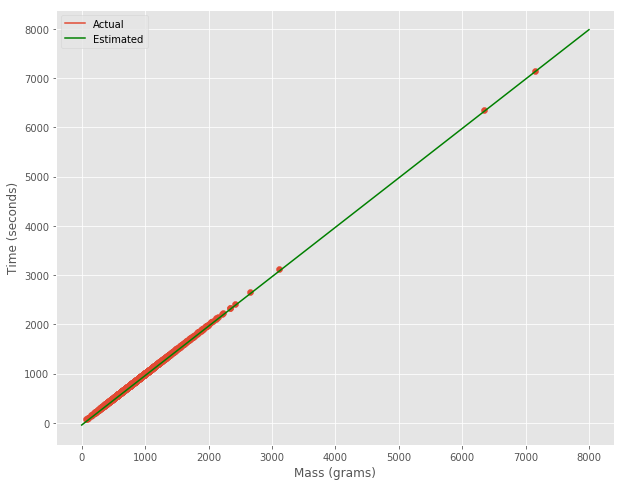

In [22]:
#To visualize the estimated line, create an x-vs-y set using m and c
x = [x/10 for x in range (0, 80000)]
y = [m*xi + c for xi in x]

#Plot again to visualize how the estimated line fairs against the original data
#orig, = plt.plot(df['P. Ts Mean (K)'], df['P. Ts Mean (K)'], )
plt.scatter(df['P. Ts Mean (K)'], df['P. Ts Mean (K)'], label = "Actual")
est, = plt.plot(x, y, label = "Estimated", color='g')
plt.xlabel('Mass (grams)')
plt.ylabel('Time (seconds)')
plt.legend(handles=[orig, est])
#plt.xlim(0, 2000)
#plt.ylim(0, 2000)
plt.show()
#plt.clf()

In [24]:
#Finding the error
error = 0.0
for index, row in df.iterrows():
    error += ((m*row['P. Ts Mean (K)'] + c) - row['P. Teq Mean (K)'])**2 #(Estimated - original)^2
error/=n

print("The mean squared error is:\t\t", error)
print("The root means squared error is:\t", error**(0.5))

The mean squared error is:		 42.14731137295646
The root means squared error is:	 6.492096069295067
